# Steiner chains

## Inversions


This is about mapping the plane onto itself. 


Student **B** was introduced to mappings in math class: Rules 
for carrying points $(x, y)$ to new locations $(u, v)$. 
She learned translation, reflection about a line and rotation about a point. 
She then began to wonder if there were mappings beyond these three... 


Consider a circle $C$ with center $c$ and radius $r$. Any point in the plane $p$ is on a 
line from $c$ to $p$. This is a *radial* line in relation to the center of $C$. 
A circle inversion **ci** maps $p$ to $q$ along a radial line defined by $c$ and $p$.
That is $q$ is determined by the rule $cp \cdot cq = r^2$. 
Defining a circle $A$ suggest the question of inverting every point in $A$ 
with respect to some $C$: What is the shape of the resulting $A'$?

flag requests:

- proof that under **ci** circles invert to circles
- animate this through 2*pi 
- fourth chart with the pull-back of the eccentric (matching Symmetric axes)
- in what follows the inversion with label A' does not appear to coincide with the points of inversion; needs to be reconciled

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# methods for inversion work that follows

def angleC2C(ca, cb):
    if ca == cb: return 0.0
    dx = cb[0]-ca[0]
    dy = cb[1]-ca[1]
    return np.arctan2(dy, dx)

def lineC2C(someAxes, ca, cb, color):
    x0 = ca[0]
    x1 = cb[0]
    y0 = ca[1]
    y1 = cb[1]
    someAxes.plot([x0,x1],[y0,y1],color)
    return

def distanceC2C(ca, cb):
    if ca == cb: return 0.0
    dx = ca[0]-cb[0]
    dy = ca[1]-cb[1]
    return np.sqrt(dx*dx + dy*dy)

def distanceP2P(u, v):
    return np.sqrt((u[0]-v[0])*(u[0]-v[0])+(u[1]-v[1])*(u[1]-v[1]))

# invert a source circle sC through an inversion circle iC
# each circle is specified as a triple (x, y, r) where the center is at (x, y) and radius = r
#   these are accessed using tuple indices [0], [1], [2] respectively
def invertCircle(sC, iC):
    # this first part takes care of some non-typical situations
    if iC[2] <= 0.0: return (iC[0], ic[1], 0.0) # which is nonsensical; the inversion circle has no useful radius
    d = distanceC2C(iC, sC)
    r = iC[2]
    R = sC[2]
    if d == 0.: # the circles are concentric
        if R <= 0.0: return(iC[0], ic[1], 0.0) # nonsensical; the target circle has zero radius so blows up
        return (iC[0], ic[1], r*r/R)
    
    # Improvement: Check that the code works for all possible cases of sC and iC
    # For now: Proceeds for the 'typical' situation 
    # Along the radial line from iC to sC we cross the near and far edges of sC at (d-R) and (d+R)
    alpha = r*r/(d+R)        # distance from center of iC to inversion of (d+R)
    beta = r*r/(d-R)         # distance from center of iC to inversion of (d-R)
    Rprime = np.fabs((beta-alpha)/2.0)    # radius of the target circle
    gamma = np.fabs((alpha + beta)/2.0)    # distance from center of iC to center of target circle
    theta = angleC2C(iC, sC)
    x = iC[0] + gamma*np.cos(theta)
    y = iC[1] + gamma*np.sin(theta)
    return (x, y, Rprime)




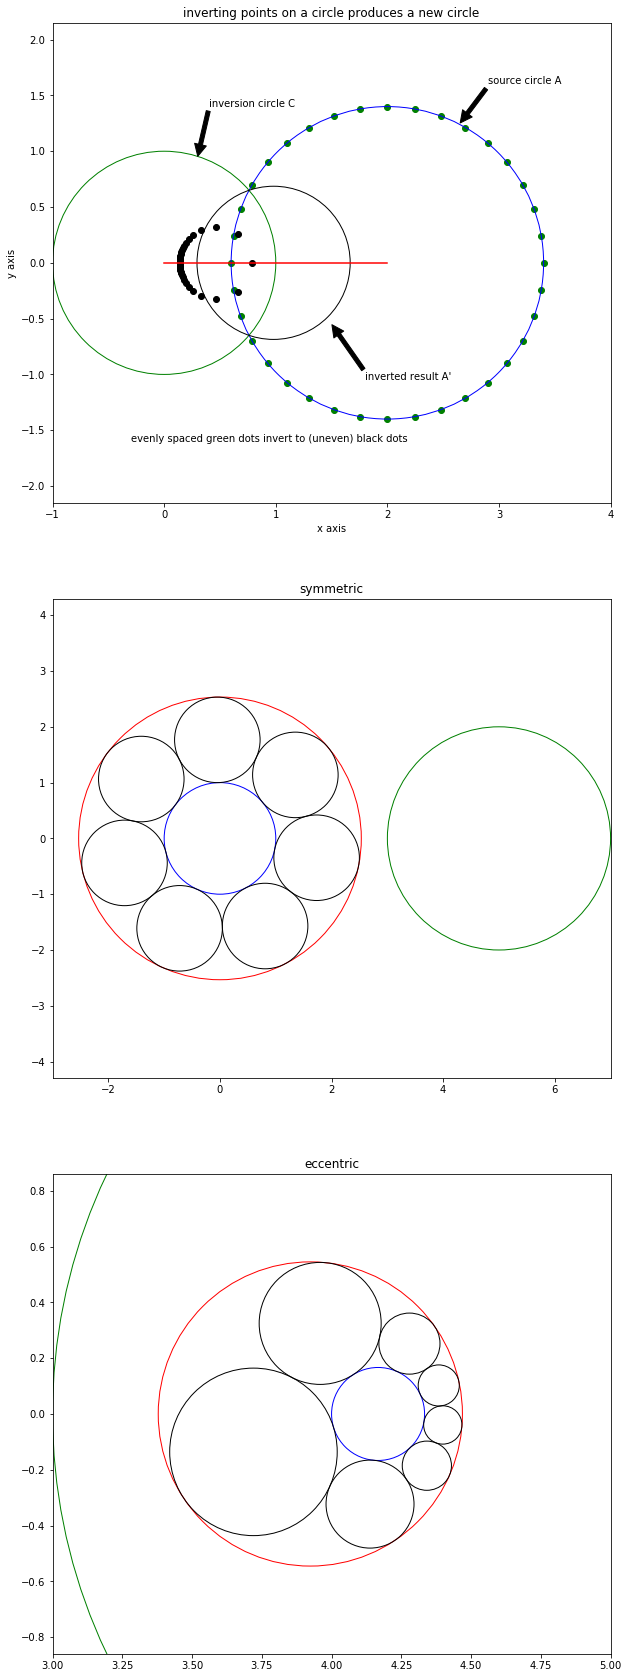

In [8]:
# plt.subplots returns a tuple: A general-context figure and a list of sub-plots assigned to axes
fig, axes = plt.subplots(3, figsize=(10,30))
chartInversion = axes[0]
chartSymmetric = axes[1]    # I break the axes list apart into more identifiable names
chartEccentric = axes[2]
chartInversion.axis('equal')  # makes sure circles look like circles
chartSymmetric.axis('equal')
chartEccentric.axis('equal')

########
#
# Inversion chart section
#
########
# a circle is a tuple (x, y, r)
unit_circle = (0.0, 0.0, 1.0)
source_circle = (2.0, 0.0, 1.4)
chartInversion.set(xlim=(-1, 4), ylim=(-3,3))
chartInversion.set(xlabel='x axis', ylabel = 'y axis', title='inverting points on a circle produces a new circle')

cSrc = plt.Circle((source_circle[0], source_circle[1]), source_circle[2], color='blue', fill=False)
cInv = plt.Circle((unit_circle[0], unit_circle[1]), unit_circle[2], color='green', fill=False)
chartInversion.add_artist(cSrc)
chartInversion.add_artist(cInv)

# lines, remember, are given by a list of x coordinates, then a list of y coordinates
lineC2C(chartInversion, unit_circle, source_circle, 'r')

cInverse = invertCircle(source_circle, unit_circle)
cResult = plt.Circle((cInverse[0], cInverse[1]), cInverse[2], color='k', fill=False)
chartInversion.add_artist(cResult)

R = source_circle[2]
r = cInverse[2]
d = source_circle[0]
for i in range(36):
    theta = float(i)*2.0*np.pi/36.0
    xRel = R*np.cos(theta)
    yRel = R*np.sin(theta)
    s = np.sqrt((d+xRel)*(d+xRel)+yRel*yRel)
    sP = r*r/s
    alpha = np.arctan2(yRel,d+xRel)
    chartInversion.scatter([d+xRel], [yRel], color='g')
    chartInversion.scatter([sP*np.cos(alpha)], [sP*np.sin(alpha)], color='k')
    # uncomment the following line to see the connections between the points
    # chartSpare.plot([d+xRel,sP*np.cos(alpha)],[yRel,sP*np.sin(alpha)],'r')

chartInversion.annotate('source circle A', xy=(2.65, 1.25), xytext=(2.9, 1.6),arrowprops=dict(facecolor='black', shrink=0.01),)
chartInversion.annotate('inversion circle C', xy=(0.3, 0.95), xytext=(0.4, 1.4),arrowprops=dict(facecolor='black', shrink=0.01),)
chartInversion.annotate("inverted result A'", xy=(1.5, -0.55), xytext=(1.8, -1.05),arrowprops=dict(facecolor='black', shrink=0.01),)
chartInversion.annotate('evenly spaced green dots invert to (uneven) black dots', xy=(0.,0.), xytext=(-.3, -1.6),)


# Symmetric chart section
chartSymmetric.set(xlim=(-3, 7), ylim=(-5,5))  # Another way: ax.set_xlim(-7, 7)
chartSymmetric.set(title='symmetric')

thetaStart = 0.7
nCircles = 7
rSmall = 1.0
alpha = (2.0*np.pi) / (2.0*float(nCircles))
rOrbit = np.sin(alpha)*rSmall/(1.0-np.sin(alpha))
rLarge = rSmall + 2*rOrbit
cSmall = plt.Circle((0.0,0.0), rSmall, color='blue', fill=False)
chartSymmetric.add_artist(cSmall)
cLarge = plt.Circle((0.0,0.0), rLarge, color='red', fill=False)
chartSymmetric.add_artist(cLarge)
for i in range(nCircles):
    theta = thetaStart + 2.0 * alpha * float(i)
    xC = (rSmall + rOrbit)*np.cos(theta)
    yC = (rSmall + rOrbit)*np.sin(theta)
    cOrb = plt.Circle((xC, yC), rOrbit, color='black', fill=False)
    chartSymmetric.add_artist(cOrb)

# left off here fixing the inversion circle in the symmetric pane    
inverter = (5, 0, 2)
cInverter = plt.Circle((inverter[0],inverter[1]), inverter[2], color='green', fill=False)
chartSymmetric.add_artist(cInverter)

    
# Eccentric chart section
chartEccentric.set(xlim=(3, 5), ylim=(-1,1))
chartEccentric.set(title='eccentric')

# Repeat the drawing of the inversion circle
cIInv = plt.Circle((inverter[0],inverter[1]), inverter[2], color='green', fill=False)
chartEccentric.add_artist(cIInv)

cISmall = invertCircle((0.0,0.0,rSmall), inverter)
cILarge = invertCircle((0.0,0.0,rLarge), inverter)

cIS = plt.Circle((cISmall[0],cISmall[1]), cISmall[2], color='blue', fill=False)
chartEccentric.add_artist(cIS)
cIL = plt.Circle((cILarge[0],cILarge[1]), cILarge[2], color='red', fill=False)
chartEccentric.add_artist(cIL)

for i in range(nCircles):
    theta = thetaStart + 2.0 * alpha * float(i)
    xC = (rSmall + rOrbit)*np.cos(theta)
    yC = (rSmall + rOrbit)*np.sin(theta)
    cInvOrb = invertCircle((xC,yC,rOrbit),inverter)
    cOrb = plt.Circle((cInvOrb[0], cInvOrb[1]), cInvOrb[2], color='black', fill=False)
    chartEccentric.add_artist(cOrb)

# fig.savefig('plotcircles.png')